<a href="https://colab.research.google.com/github/abhaymamadapur/CE888/blob/main/lab%208/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset from zip file

In [1]:
from urllib.request import urlretrieve
urlretrieve("https://github.com/sagihaider/CE888_2021/blob/48596dc985737423025dfbe3163dc26fdb3a08aa/Lab_8/data.zip")

('/tmp/tmpnslsiaxi', <http.client.HTTPMessage at 0x7f529e6ef950>)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from zipfile import ZipFile
fileNamePath = "/content/drive/MyDrive/Colab_Notebooks/Lab_8/data.zip"

with ZipFile(fileNamePath, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import os
# Get all the paths

path, dirs, files = next(os.walk("/content/data/cats"))
file_count = len(files)
print("No of files in cats",file_count)
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print("No of files in dogs",file_count)
path, dirs, files = next(os.walk("/content/data/horses"))
file_count = len(files)
print("No of files in horses",file_count)
path, dirs, files = next(os.walk("/content/data/Humans"))
file_count = len(files)
print("No of files in Humans",file_count)

No of files in cats 202
No of files in dogs 202
No of files in horses 202
No of files in Humans 202


In [5]:
# Make new base directory
original_dataset_dir_cats = "/content/data/cats"
original_dataset_dir_dogs = "/content/data/dogs"
original_dataset_dir_horses = "/content/data/horses"
original_dataset_dir_humans = "/content/data/Humans"
base_dir = "/content/cats_dogs_horses_human"
os.mkdir(base_dir)

In [6]:
train_directory = os.path.join(base_dir, 'train')
os.mkdir(train_directory)

validation_directory = os.path.join(base_dir, 'validation')
os.mkdir(validation_directory)

test_directory = os.path.join(base_dir, 'test')
os.mkdir(test_directory)

In [7]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(train_directory, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(validation_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(test_directory, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(train_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(validation_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(test_directory, fname)
    shutil.copyfile(src, dst)

import shutil
fnames = ['horse-{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(train_directory, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(validation_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horses, fname)
    dst = os.path.join(test_directory, fname)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(1,141)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(train_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(141, 172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(validation_directory, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(172, 202)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_humans, fname)
    dst = os.path.join(test_directory, fname)
    shutil.copyfile(src, dst)

In [8]:
path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/train"))
file_count = len(files)
print("No of train files ",file_count)

path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/validation"))
file_count = len(files)
print("No of validation files ",file_count)

path, dirs, files = next(os.walk("/content/cats_dogs_horses_human/test"))
file_count = len(files)
print("No of test files ",file_count)

No of train files  560
No of validation files  124
No of test files  120


In [9]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [10]:
def label_img(img):
  #print(img)
  if img.find('-')!=-1:
      #print(img)
      word_label = img.split('-')[0]
      if word_label == 'horse': return 2
      elif word_label == 'rider': return 3
      
  else :
      word_label = img.split('.')[0]
      if word_label == 'dog': return 1
      elif word_label == 'cat': return 0

def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
       
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [11]:
train_X, train_y = createDataSplitSet(train_directory)
val_X, val_y = createDataSplitSet(validation_directory)
test_X, test_y = createDataSplitSet(test_directory)

### Import tensorflow keras libraries

In [12]:

from tensorflow.keras.applications import VGG16,VGG19,InceptionV3
from tensorflow.keras.layers import Dense, Input, Flatten,Dropout,Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras import layers 

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_recall_fscore_support, roc_auc_score


In [13]:
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

### VGG19 FE

In [14]:
vgg19_model_fe = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
vgg19_model_fe.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
last_layer = vgg19_model_fe.get_layer('fc2').output
out = Dense(4, activation='sigmoid', name='output')(last_layer)  ## 2 classes
vgg19_model_fe = Model(img_input, out)

for layer in vgg19_model_fe.layers[:-1]:
	layer.trainable = False

vgg19_model_fe.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
vgg19_model_fe.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [17]:

my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]

In [18]:
history = vgg19_model_fe.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
56/56 [==============================] - 16s 106ms/step - loss: 1.4444 - acc: 0.3970 - val_loss: 1.1135 - val_acc: 0.5242
Epoch 2/10
56/56 [==============================] - 4s 77ms/step - loss: 0.8126 - acc: 0.7015 - val_loss: 0.6506 - val_acc: 0.7742
Epoch 3/10
56/56 [==============================] - 4s 77ms/step - loss: 0.5799 - acc: 0.7971 - val_loss: 0.8016 - val_acc: 0.6290
Epoch 4/10
56/56 [==============================] - 4s 77ms/step - loss: 0.5335 - acc: 0.7901 - val_loss: 0.5158 - val_acc: 0.8468
Epoch 5/10
56/56 [==============================] - 4s 78ms/step - loss: 0.4959 - acc: 0.8085 - val_loss: 0.4787 - val_acc: 0.8548
Epoch 6/10
56/56 [==============================] - 4s 79ms/step - loss: 0.3511 - acc: 0.8534 - val_loss: 0.4723 - val_acc: 0.8065
Epoch 7/10
56/56 [==============================] - 4s 79ms/step - loss: 0.4030 - acc: 0.8376 - val_loss: 0.4681 - val_acc: 0.8387
Epoch 8/10
56/56 [==============================] - 4s 80ms/step - loss: 0.3364 -

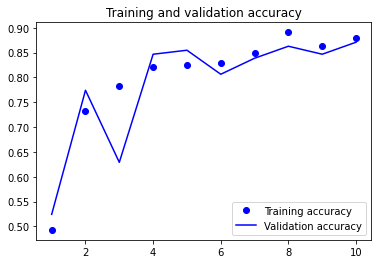

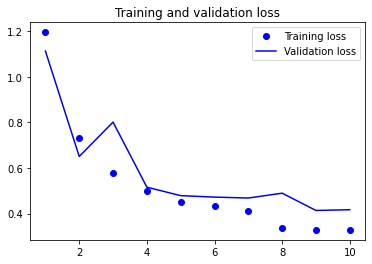

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Test Accuracy
predictions = vgg19_model_fe.predict(test_X)
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)

Train Accuracy:	 0.8785714507102966
Val Accuracy:	 0.8709677457809448
Test Accuracy:	 0.9083333333333333
Precision:	 0.9087677368927369
Recall:		 0.9083333333333333
F1 Score:	 0.9069097010230434


###VGG19 FT

In [22]:
vgg19_model_ft = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
vgg19_model_ft.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
last_layer = vgg19_model_ft.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='sigmoid', name='output')(x) 
vgg19_model_ft = Model(img_input, out)

for layer in vgg19_model_ft.layers[:-3]:
	layer.trainable = False


vgg19_model_ft.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [24]:
vgg19_model_ft.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['acc'])

In [25]:
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg19_model.h5', save_best_only=True),
]

In [26]:
history = vgg19_model_ft.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
56/56 [==============================] - 6s 86ms/step - loss: 1.6453 - acc: 0.4883 - val_loss: 0.3787 - val_acc: 0.8629
Epoch 2/10
56/56 [==============================] - 5s 83ms/step - loss: 0.1459 - acc: 0.9651 - val_loss: 0.4287 - val_acc: 0.8145
Epoch 3/10
56/56 [==============================] - 5s 84ms/step - loss: 0.0767 - acc: 0.9892 - val_loss: 0.3184 - val_acc: 0.8871
Epoch 4/10
56/56 [==============================] - 5s 85ms/step - loss: 0.0181 - acc: 1.0000 - val_loss: 0.3387 - val_acc: 0.8871
Epoch 5/10
56/56 [==============================] - 5s 86ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.3390 - val_acc: 0.8710
Epoch 6/10
56/56 [==============================] - 5s 87ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.3585 - val_acc: 0.8710
Epoch 7/10
56/56 [==============================] - 5s 88ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.3800 - val_acc: 0.8790
Epoch 8/10
56/56 [==============================] - 5s 88ms/step - loss: 0.0021 - a

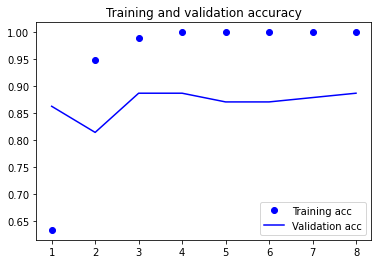

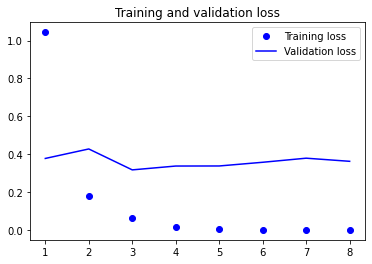

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# Test Accuracy
predictions = vgg19_model_ft.predict(test_X)
ypred = np.argmax(predictions, axis=1)
test_acc = accuracy_score(test_y, ypred)

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)


Train Accuracy:	 1.0
Val Accuracy:	 0.8870967626571655
Test Accuracy:	 0.8666666666666667
Precision:	 0.8719430969430969
Recall:		 0.8666666666666666
F1 Score:	 0.865321419219691
